In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-adapt-motive)

This function gets increasingly oscillatory as $x$ increases.

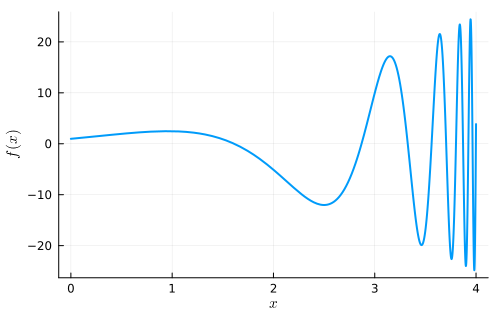

In [2]:
f = x -> (x + 1)^2 * cos((2x + 1) / (x - 4.3))
plot(f, 0, 4, xlabel=L"x", ylabel=L"f(x)")

Accordingly, the trapezoid rule is more accurate on the left half of this interval than on the right half.

In [3]:
using QuadGK
left_val, _ = quadgk(f, 0, 2, atol=1e-14, rtol=1e-14)
right_val, _ = quadgk(f, 2, 4, atol=1e-14, rtol=1e-14)

n = [50 * 2^k for k in 0:3]
err = zeros(length(n), 2)
for (k, n) in enumerate(n)
    T, _ = FNC.trapezoid(f, 0, 2, n)
    err[k, 1] = T - left_val

    T, _ = FNC.trapezoid(f, 2, 4, n)
    err[k, 2] = T - right_val
end

@pt :header=["n", "left error", "right error"] [n err]

n,left error,right error
50.0,-0.00249106,0.504229
100.0,-0.000622715,0.0960044
200.0,-0.000155675,0.0225473
400.0,-3.89187e-5,0.00555422


Both the picture and the numerical results suggest that more nodes should be used on the right half of the interval than on the left half.